# Работа с количественными данными

$\sin(\cos(x))$

## Чтение данных из файла

Для ознакомления с необходимым материал рекомендую книгу [1, глава 6, стр. 175].     
В рассматриваемом примере исходные данные хранятся в txt-файле, разделенные знаком табуляции.    
Для чтения воспользуемся функцией `.read_table()`.    
В качестве параметров передадим
- `path` -- путь к файлу;
- `encoding` -- исходную кодировку, в которой хранятся данные;
- `sep` -- последовательность символов или регулярное выражение, служащее для разделения полей в строке: ',',';','\t'(знак табуляции), '\s+' -- если поля разделены переменным числом пробелов;
- `nrows` -- количество читаемых строк от начала файла.

Подключаем библиотеку `pandas` и загружаем исходные данные в датафрейм `df` 

In [191]:
import pandas as pd
pd.set_option('display.precision',3)
df=pd.read_table('mobile.txt', encoding='1251', sep='\t', nrows=100)

## Получение предварительной информации о массиве данных   

Для получения предварительной информации об анализируемом массиве можно воспользоваться следующими возможностями Python    
- Просмотр с помощью свойства `.head()` указанного числа первых строк датафрейма. По умолчанию выводится 5 первых строк датафрейма;
- Размерность датафрейма можно узнать с помощью свойства .shape;
- Просмотр заголовков столбов с помощью свойства .columns;
- Просмотр информации о типах переменных с помощью свойства `.info()`;
- Вывод общей информации о наличие пропусков во всех переменных можно осуществить, воспользовавшись цепочкой методов `.isnull()` и `.sum()`

In [192]:
df.head()

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,0,24,121.54,2.4,12,65,5,0,0,5,56
1,1,51,287.51,1.7,111,109,1,44,0,6,1
2,2,41,113.70,2.1,41,27,0,0,0,1,36
3,3,35,410.23,5.6,47,49,0,0,0,11,23
4,4,26,537.60,4.8,58,77,4,0,0,16,29


In [193]:
df.iloc[:,1:6:2]

,Возраст,Средняя продолжительность разговоров,Звонков вечером за месяц
0,24,2.4,65
1,51,1.7,109
2,41,2.1,27
3,35,5.6,49
4,26,4.8,77
...,...,...,...
95,29,18.2,78
96,54,1.1,68
97,25,3.7,45
98,54,2.8,98


ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ: С помощью свойства `.tail()` можно просмотреть заданное число последних строк массива. По умолчанию выводится 5 строк 

+ Размерность датафрейма можно узнать с помощью свойства `.shape`    
ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ: количество строк датафрейма можно узнать с помощью метода `len()`

In [194]:
df.shape

(100, 11)

+ Просмотр заголовков столбов с помощью свойства `.columns` 

In [195]:
df.columns

Index(['Код', 'Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')

- Просмотр информации о типах переменных с помощью свойства `.info()`

In [196]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
Код                                      100 non-null int64
Возраст                                  100 non-null int64
Среднемесячный расход                    100 non-null float64
Средняя продолжительность разговоров     100 non-null float64
Звонков днем за месяц                    100 non-null int64
Звонков вечером за месяц                 100 non-null int64
Звонков ночью за месяц                   100 non-null int64
Звонки в другие города                   100 non-null int64
Звонки в другие страны                   100 non-null int64
Доля звонков на стационарные телефоны    100 non-null int64
Количество SMS за месяц                  100 non-null int64
dtypes: float64(2), int64(9)
memory usage: 8.7 KB
None


- Вывод общей информации о наличие пропусков во всех переменных можно осуществить, воспользовавшись цепочкой методов `.isnull()` и `.sum()`

In [197]:
df.isnull().sum()

Код                                      0
Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
dtype: int64

## Доступ к данным датафрейма      

- Доступ к столбцам;
- Доступ к строкам;
- Доступ к строкам и столбцам;
- Работа со срезами;

Доступ к одному или нескольким столбцам по имени

In [203]:
df['Средняя продолжительность разговоров'].head()

0    2.4
1    1.7
2    2.1
3    5.6
4    4.8
Name: Средняя продолжительность разговоров, dtype: float64

In [206]:
df[['Возраст','Средняя продолжительность разговоров']].head()

,Возраст,Средняя продолжительность разговоров
0,24,2.4
1,51,1.7
2,41,2.1
3,35,5.6
4,26,4.8


- Доступ к одной или нескольким строкам по индексу через свойства `.loc[]` и `.iloc[]`  

In [215]:
df.loc[[2,4]]

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
2,2,41,113.7,2.1,41,27,0,0,0,1,36
4,4,26,537.6,4.8,58,77,4,0,0,16,29


In [218]:
df.iloc[[2,4]]

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
2,2,41,113.7,2.1,41,27,0,0,0,1,36
4,4,26,537.6,4.8,58,77,4,0,0,16,29


- Работа со срезами     
Создание срезов или слайсинг (slicing) --- способ извлечения подмножеств данных из пандасовского объекта.    
Формат среза в датафрейме: $[i_{\text{инд.нач.стр.}}: n_{\text{инд.кон.стр.}}: i_{\text{шаг}}, j_{\text{инд.нач.столб.}}: m_{\text{инд.кон.столб.}}: j_{\text{шаг}}$     
Здесь $i_{\text{инд.нач.стр.}},\, j_{\text{инд.нач.столб.}}$ и $n_{\text{инд.кон.стр.}},\,m_{\text{инд.кон.столб.}}$ --- начальные и конечные индексы по строкам и столбцам, соответственно; $i_{\text{шаг}}$ и $j_{\text{шаг}}$ --- правила изменения приращений по строкам и столбцам, соответственно.    
Строка (столбец), соответствующая крайнему указанному индексу $n_{\text{инд.кон.стр.}}$ $(m_{\text{инд.кон.столб.}})$ не будет включена в срез.     
Если не указаны начальные индекчы среза, то они считаются равными 0. Если не указаны конечные индексы среза, то они считаются равными индексу последней строки (столбца).    
Если не указаны приращения, то они считаются равными 1.

In [220]:
df.iloc[:,:]

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,0,24,121.54,2.4,12,65,5,0,0,5,56
1,1,51,287.51,1.7,111,109,1,44,0,6,1
2,2,41,113.70,2.1,41,27,0,0,0,1,36
3,3,35,410.23,5.6,47,49,0,0,0,11,23
4,4,26,537.60,4.8,58,77,4,0,0,16,29
...,...,...,...,...,...,...,...,...,...,...,...
95,96,29,1977.50,18.2,100,78,42,38,0,0,62
96,97,54,117.37,1.1,69,68,5,22,0,10,3
97,98,25,336.70,3.7,60,45,2,31,0,22,14
98,99,54,354.76,2.8,59,98,0,1,0,0,5


In [221]:
df.iloc[1:6:2,:]

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
1,1,51,287.51,1.7,111,109,1,44,0,6,1
3,3,35,410.23,5.6,47,49,0,0,0,11,23
5,5,26,324.56,3.3,45,75,3,1,1,8,15


In [222]:
df.iloc[0:6:2,:1:1]

,Код
0,0
2,2
4,4


Для получения только значений среза можно воспользоваться свойством `.values`

In [223]:
df.iloc[0:6:2,:1:1].values

array([[0],
       [2],
       [4]], dtype=int64)

## Редактирование датафрейма     
- Удаление столбцов
    - С помощью ключевого слова `del`
    - C помощью метода `.pop()`
    - С помощью метода `.drop()` 

Удаление столбца 'Код', не слияющего на результаты анализа

In [123]:
del df['Код']

## Иерархическая кластеризация: агломеративный алгоритм 

Для изучания материала рекомендуется воспользоваться ресурсом [2]    
Иерархическая кластеризация реализована в модуле `scipy.cluster.hierarchy`.    
Импортируем из этого модуля методы:    
- `.linkage()` -- выполняет иерархическую (агломеративную) кластеризацию; 
- `.fcluster()` -- 
- `.dendrogram()` -- строит дендрограмму.  

Метод `.linkage()` имеет следующую спецификацию `linkage(y[, method, metric, optimal_ordering])`:    
- y -- матрица попарных расстояний или исходных данных (в матрице не должно быть пробелов или категориальных значений)
- method -- правило, по которому будут рассчитываться расстояния между кластерами:    
    - `single`
    - `complete`
    - `average`
    - `weighted`
    - `centroid`
    - `median`
    - `ward`
- metric -- метрика: `braycurtis`, `canberra`, `chebyshev`, `cityblock`, `correlation`, `cosine`, `dice`, `euclidean`, `hamming`, `jaccard`, `jensenshannon`, `kulsinski`, `mahalanobis`, `matching`, `minkowsk`, `rogerstanimoto`, `russellrao`, `seuclidean`, `sokalmichener`, `sokalsneath`, `sqeuclidean`, `yule`.

In [134]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

In [186]:
X=df.iloc[:,:].values
X=(X-X.mean(axis=0))/X.std(axis=0)

In [187]:
print(X)

[[-1.70439203 -1.59063524 -0.61591432 ... -0.33786869 -0.542543
   1.9595218 ]
 [-1.670126    0.45446721 -0.33339567 ... -0.33786869 -0.45105177
  -0.76823571]
 [-1.63585998 -0.30297814 -0.62925978 ... -0.33786869 -0.90850793
   0.96760998]
 ...
 [ 1.65367831 -1.51489071 -0.24966311 ... -0.33786869  1.01280794
  -0.12349302]
 [ 1.68794434  0.68170082 -0.21892089 ... -0.33786869 -0.99999916
  -0.56985334]
 [ 1.72221036  0.15148907 -0.10791865 ... -0.33786869 -0.72552547
  -0.66904452]]


In [170]:
X.mean(axis=0)

array([-8.32667268e-18, -3.69149156e-17, -1.08246745e-16,  8.43769499e-17,
        7.10542736e-17, -1.83186799e-17,  3.33066907e-17,  9.99200722e-18,
        1.33226763e-17,  8.54871729e-17])

In [171]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

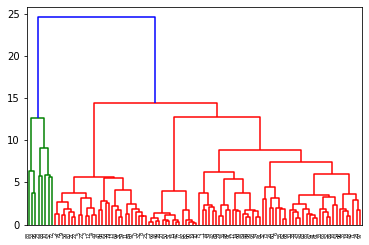

In [172]:
mergings = linkage(X, method='ward') #complete, single
r=plt.figure()
dendrogram(mergings)
r.savefig('1.png', dpi = 300)

In [131]:
pd.set_option('display.precision',3)
print(mergings)

[[1.90000000e+01 7.00000000e+01 4.71682096e+00 2.00000000e+00]
 [8.20000000e+01 1.00000000e+02 7.77381073e+00 3.00000000e+00]
 [5.00000000e+01 5.10000000e+01 8.56738000e+00 2.00000000e+00]
 [2.00000000e+01 1.02000000e+02 9.97434041e+00 3.00000000e+00]
 [7.00000000e+00 7.70000000e+01 1.01081353e+01 2.00000000e+00]
 [4.70000000e+01 7.60000000e+01 1.11121555e+01 2.00000000e+00]
 [9.00000000e+01 1.01000000e+02 1.14852260e+01 4.00000000e+00]
 [4.60000000e+01 6.60000000e+01 1.43797218e+01 2.00000000e+00]
 [1.50000000e+01 1.05000000e+02 1.50620937e+01 3.00000000e+00]
 [5.00000000e+00 2.20000000e+01 1.51982762e+01 2.00000000e+00]
 [6.10000000e+01 6.80000000e+01 2.02012401e+01 2.00000000e+00]
 [2.70000000e+01 5.50000000e+01 2.19635812e+01 2.00000000e+00]
 [8.70000000e+01 1.06000000e+02 2.35428734e+01 5.00000000e+00]
 [8.00000000e+00 9.20000000e+01 2.37973129e+01 2.00000000e+00]
 [1.04000000e+02 1.07000000e+02 2.67133862e+01 4.00000000e+00]
 [6.50000000e+01 8.60000000e+01 2.75637516e+01 2.000000

In [132]:
hierarchy.linkage(ytdist, 'single')
>>> plt.figure()
>>> 

NameError: name 'hierarchy' is not defined

In [ ]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [42]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print(X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [-0.20554413  7.23456651  9.21355279  7.00944978 11.669758    9.25611603
  13.81418824 13.89198106 20.80048479 20.7822308 ]]


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(np.transpose(df1))
print(XPCAreduced)

[[157527.00132074  -6740.54933833]
 [-17622.76384557  -4298.61650433]
 [  9711.92869037  41493.58848523]
 [-19806.33973109  -4563.01149429]
 [-16311.26952678   -724.81241875]
 [-15962.22691555  -2885.67223874]
 [-19685.78719505  -4337.9707885 ]
 [-19546.0478237   -4390.87065074]
 [-20029.10708072  -4735.8430624 ]
 [-19448.45747971  -4445.99639957]
 [-18826.93041294  -4370.24558959]]


In [15]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())


In [16]:
covmat = np.cov(Xcentered)

In [20]:
vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = dot(v,Xcentered)
print(Xnew)


TypeError: tuple indices must be integers or slices, not tuple

Литература
1. Маккинли У. Python и анализ данных. - М.: ДМК Пресс, 2015. – 482 с.
2. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/